# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Not for Grading

#  Word2Vec Similarity

In [1]:
#@title Case Study Walkthrough
#@markdown Word2Vec Similarity
from IPython.display import HTML

HTML("""<video width="320" height="240" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/preview_videos/word2vec_similarity.mp4">
</video>
""")

This experiment is to understand the visualization of Word2Vec representations.


### Setup Steps

In [11]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [17]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [18]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "CS_U2W7_10_Word2Vec_Similarity" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://www.dropbox.com/s/9xivz2pox1i83td/AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1")
    ipython.magic("sx mv AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1 AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")    
    ipython.magic("sx wget https://www.dropbox.com/s/fm7nvhyvekhaka4/AIML_DS_WORD2VEC2D_STD.pkl.zip?dl=1")
    ipython.magic("sx mv AIML_DS_WORD2VEC2D_STD.pkl.zip?dl=1 AIML_DS_WORD2VEC2D_STD.pkl.zip")
    ipython.magic("sx unzip AIML_DS_WORD2VEC2D_STD.pkl.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


##Importing required packages

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import gensim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import warnings
warnings.filterwarnings("ignore")

##Loading Word2vec pretrained model

In [20]:
model = gensim.models.KeyedVectors.load_word2vec_format('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin', binary=True, limit=500000)

In [25]:
words = ['man', 'woman', 'king', 'queen']

In [26]:
%matplotlib inline

##Visualising and plotting the reduced word2vec representations

In [34]:
def words_plot(words, word_pairs, elev=20, azim=32, dimensions = 3, lines = True):
  #print(word_pairs)
  embeddings = []
  #print(words)
  for word in words:
    embeddings.append(model[word])
  embeddings = np.array(embeddings)
  
  
  if dimensions == 3:
    embedding_3d = TSNE(n_components=3).fit_transform(embeddings)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for index, ( x, y, z) in enumerate(embedding_3d):
      ax.scatter(x, y, z, c='r', marker='o')
      ax.text(x, y, z, words[index])
    if lines:
      for pair in word_pairs:
        #print(word_pairs)
        xplt, yplt, zplt = [], [], []
        for word in pair:
          #print(word)
          sn = words.index(word)
          xw,yw,zw = embedding_3d[sn]
          xplt.append(xw)
          yplt.append(yw)
          zplt.append(zw)

          ax.plot3D(xplt, yplt,zplt)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.grid(True)
    ax.view_init(elev=elev, azim=azim)
    plt.show()
    
  else:
    embedding_2d = TSNE(n_components=2).fit_transform(embeddings)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for index, ( x, y) in enumerate(embedding_2d):
      ax.scatter(x, y, c='r', marker='o')
      ax.text(x, y, words[index])
    if lines:    
      for pair in word_pairs:
        xplt, yplt= [], []
        for word in pair:
          sn = words.index(word)
          xw,yw = embedding_2d[sn]
          xplt.append(xw)
          yplt.append(yw)

          ax.plot(xplt, yplt)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.grid(True)
    plt.show()

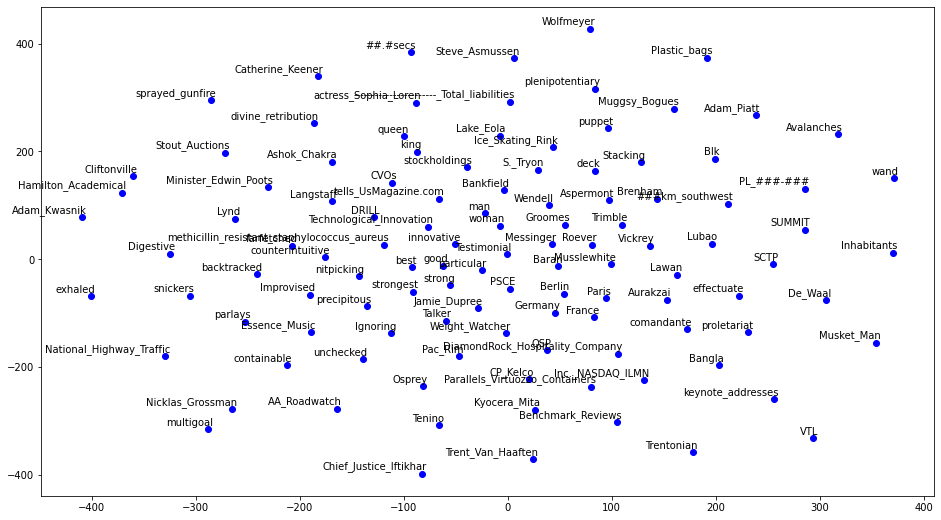

In [33]:
def plot_values(values, labels, figsize = (8,4), c = []):
    x = []
    y = []
    for value in values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=figsize) 
    for i in range(len(labels)):
        plt.scatter(x[i],y[i], color=c[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


#.pkl file which is already trainied file which contain two dimentional represenatation of a word
two_dim_model = pickle.load(open('AIML_DS_WORD2VEC2D_STD.pkl', 'rb'))

wv_labels = {}
for vec, word in two_dim_model:
    wv_labels[word] = vec
    
colors = ['blue' for i in range(len(wv_labels))]

plot_values(wv_labels.values(), list(wv_labels.keys()), figsize = (16, 9), c = colors)

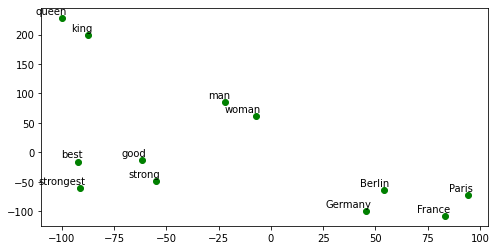

In [35]:
wv_list = ['king', 'queen', 'man', 'woman', 'Germany', 'France', 'Berlin', 'Paris', 'best', 'good', 'strong', 'strongest']
wv_new_labels = {}
for word in wv_list:
    wv_new_labels[word] = wv_labels[word]

colors = ['green' for i in range(len(wv_new_labels))]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)

##Representing Man, Woman, King, queen

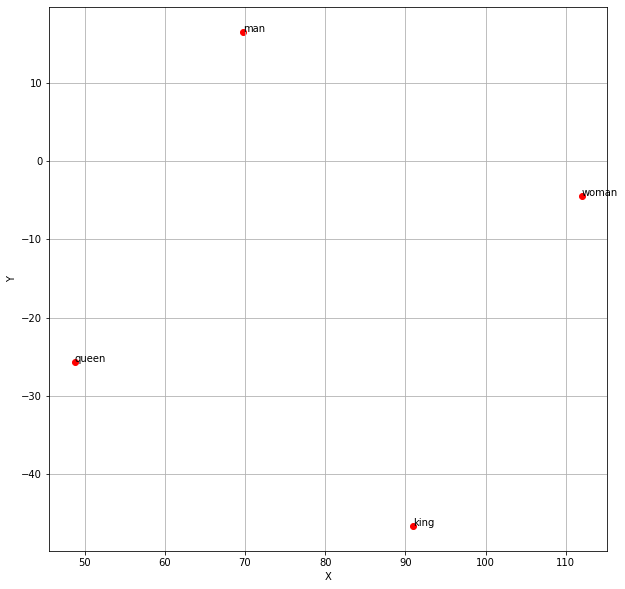

In [36]:
words = ['man', 'woman', 'king', 'queen']
word_pairs = [['man', 'woman'], ['king', 'queen']]
words_plot(words, word_pairs, dimensions=2, lines=False)

##Representing Countries and its capitals

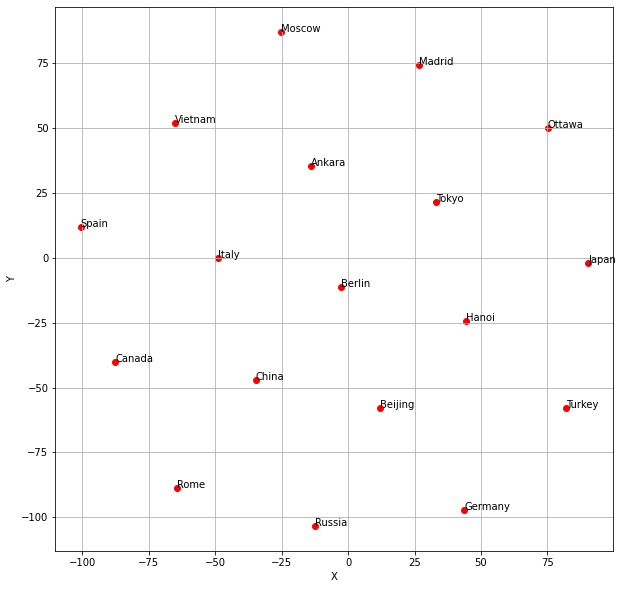

In [37]:
word_pairs =[['Spain', 'Madrid'], ['Italy', 'Rome'], ['Germany', 'Berlin']
              , ['Turkey', 'Ankara'], ['Russia', 'Moscow'], ['Canada', 'Ottawa']
              , ['Japan', 'Tokyo'], ['Vietnam', 'Hanoi'], ['China', 'Beijing']]
words = list(np.array(word_pairs).flatten())
words_plot(words, word_pairs, dimensions=2, lines=False)

##Finding the nearest or most similar words of .a word using Word2vec

In [38]:
words = ['France','JESUS', 'XBOX', 'Reddish', 'Scratched', 'MB']
for word in words:
  print('Top 10 similar words for {} are:'.format(word))
  for index,  (similar_word, similarity) in enumerate(model.most_similar(word)):
    print("\t {}. {} (similarity is {})".format(index+1, similar_word, similarity) )

Top 10 similar words for France are:
	 1. French (similarity is 0.7000749707221985)
	 2. Belgium (similarity is 0.6933180689811707)
	 3. Paris (similarity is 0.6334909796714783)
	 4. Germany (similarity is 0.6270755529403687)
	 5. Italy (similarity is 0.6135216951370239)
	 6. Spain (similarity is 0.606421947479248)
	 7. Nantes (similarity is 0.604239284992218)
	 8. Marseille (similarity is 0.6037612557411194)
	 9. Montpellier (similarity is 0.5765001177787781)
	 10. Les_Bleus (similarity is 0.5707370638847351)
Top 10 similar words for JESUS are:
	 1. HOLY (similarity is 0.6520069241523743)
	 2. SPIRITUAL (similarity is 0.6346266269683838)
	 3. BLESSED (similarity is 0.629273533821106)
	 4. GOD_'S (similarity is 0.6278128623962402)
	 5. GOD (similarity is 0.626646876335144)
	 6. WORSHIP (similarity is 0.6221975684165955)
	 7. FAITH (similarity is 0.6203465461730957)
	 8. BIBLE (similarity is 0.616431474685669)
	 9. THE_WORD (similarity is 0.6132077574729919)
	 10. HEAVEN (similarity is 



```
# This is formatted as code
```

##Verify Clusters in the Word2vec from the following link:

https://projector.tensorflow.org/

##Understand the semantics preserved by Word2vec by chosing the words along x and y axis to represents the other words in that co-oridinate system

https://lamyiowce.github.io/word2viz/

### Please answer the questions below to complete the experiment:




In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")